Importing the dependencies

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics

Data Collection and Processing

In [2]:
#loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
#inspecting the first 5 rows of the dataframe
car_dataset.head() #"head()" function will show the first 5 rows of dataframe

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
#checking the number of rows and columns
car_dataset.shape #"shape" gives the no. of rows and columns (no of datapoints)

(4340, 8)

In [5]:
#getting some information about the dataset
car_dataset.info() #"info()" function gives the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [8]:
#checking the number of missing values (not required in this dataset)
car_dataset.isnull().sum()
#"isnull().sum()" function will tell how many null values in each column
#"isnull()" function alone will give check for eack row and each column

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [14]:
#checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())
#"value_counts()" counts the no. of values in each category of selected column

fuel
0    2153
1    2123
2      40
4      23
5       1
Name: count, dtype: int64
seller_type
0    3244
1     994
2     102
Name: count, dtype: int64
transmission
0    3892
1     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


Encoding the Categorical Data

In [26]:
#encoding "fuel" column
car_dataset.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,"LPG":3,"Electric":4}},inplace=True)

#encoding "seller_type" column
car_dataset.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)

#encoding "transmission" column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

#"inplace=True" parameter is used to apply a method's changes directly to original object rather than creating new with the modifications.

In [27]:
#encoding "owner" column
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,"Fourth & Above Owner":3,"Test Drive Car":4}},inplace=True)


In [28]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


Splitting the Data and Target

In [29]:
X=car_dataset.drop(['name','selling_price'],axis=1)
Y=car_dataset['selling_price']#"Y" stores our target data, i.e., "selling_price"

#"axis=1" shows columns and "axis=0" shows rows
# this will load all the dataset except "name" and "selling_price" in "X", and
# the value of "selling_price"(only) in "Y"

In [32]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      0
1     2007      50000     1            0             0      0
2     2012     100000     0            0             0      0
3     2017      46000     1            0             0      0
4     2014     141000     0            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      1
4336  2014      80000     0            0             0      1
4337  2009      83000     1            0             0      1
4338  2016      90000     0            0             0      0
4339  2016      40000     1            0             0      0

[4340 rows x 6 columns]


In [33]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Splitting Training and Test Data

In [112]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.1, random_state=2)

#"test_size=0.2" tells that test data size will be 20% of the original data
#"random_state=2" is a state of randomness, we can put higher or lower number at the place of "2"

Model Training

1. Linear Regression

In [133]:
#loading linear regression model
lin_reg_model=LinearRegression()

In [134]:
lin_reg_model.fit(X_train, Y_train) #"fit()" function is used to train our model

LinearRegression()

Model Evaluation

In [115]:
#prediction on training data
training_data_prediction=lin_reg_model.predict(X_train)
#It tells that predict on the basis of "X" training dataset (obviously), it will predict on the basis of other data sets, i.e., "X"

In [116]:
#R squared Error
error_score=metrics.r2_score(Y_train, training_data_prediction)
print("R squared error score: ",  error_score) #it is giving around 0.43 error

#"r2_score()" is the function of "metrics" module of "sklearn" library, which -
#-gives us R squared error. In this function, we compare our actual targeted -
#-value and the predicted value (by model)

# we can use various other metrics also for regression to get this error score -
#- like mean squared error, root mean square error, etc.

#we use accuracy score of the classification problem, while we use error score -
#-for the regression problem, are here since it is the regression problem, we -
#-are using error score

#also for the model evaluation, we can plot the targetted values and the -
#-values predicted by our model.

R squared error score:  0.438722511646364


Visualize the Actual Prices and the Predicted Prices

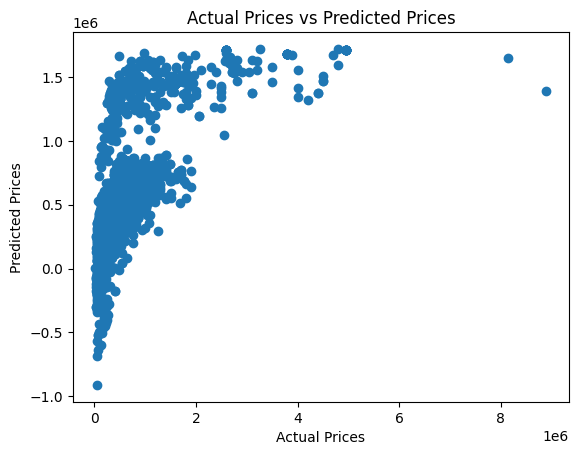

In [117]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

#here "plt" is "matplotlib"(we imported at begining). "scatter()" is the -
#function for scatter plot, since here we are plotting scattered plot.
#"show()" function of matplotlib library shows the formed graph

Now, Model Evaluation for Test Data

In [118]:
#prediction on testing data
testing_data_prediction=lin_reg_model.predict(X_test)
#It tells that predict on the basis of "X" testing dataset (obviously), it will predict on the basis of other data sets, i.e., "X"

In [119]:
#R squared Error
error_score=metrics.r2_score(Y_test, testing_data_prediction)
print("R squared error score: ",  error_score) #it is giving around 0.43 error

R squared error score:  0.5173352962576018


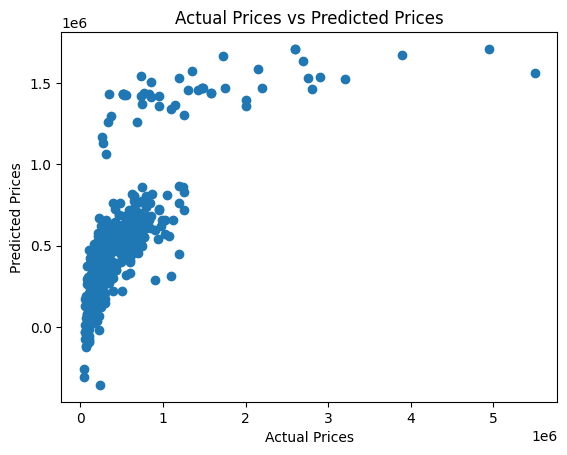

In [120]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [122]:
#loading lasso regression model
lasso_reg_model=Lasso()

In [123]:
lasso_reg_model.fit(X_train, Y_train) #"fit()" function is used to train our model

Lasso()

Model Evaluation

In [126]:
#prediction on training data
training_data_prediction=lasso_reg_model.predict(X_train)
#It tells that predict on the basis of "X" training dataset (obviously), it will predict on the basis of other data sets, i.e., "X"

In [127]:
#R squared Error
error_score=metrics.r2_score(Y_train, training_data_prediction)
print("R squared error score: ",  error_score) #it is giving around 0.43 error

#"r2_score()" is the function of "metrics" module of "sklearn" library, which -
#-gives us R squared error. In this function, we compare our actual targeted -
#-value and the predicted value (by model)

# we can use various other metrics also for regression to get this error score -
#- like mean squared error, root mean square error, etc.

#we use accuracy score of the classification problem, while we use error score -
#-for the regression problem, are here since it is the regression problem, we -
#-are using error score

#also for the model evaluation, we can plot the targetted values and the -
#-values predicted by our model.

R squared error score:  0.4387225115955954


Visualize the Actual Prices and the Predicted Prices

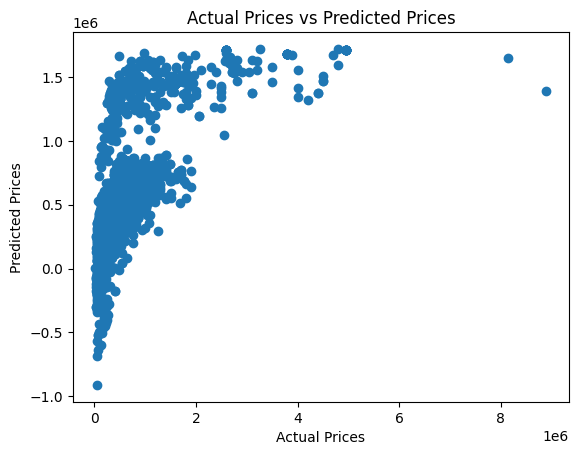

In [128]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

#here "plt" is "matplotlib"(we imported at begining). "scatter()" is the -
#function for scatter plot, since here we are plotting scattered plot.
#"show()" function of matplotlib library shows the formed graph

Now, Model Evaluation for Test Data

In [129]:
#prediction on testing data
testing_data_prediction=lasso_reg_model.predict(X_test)
#It tells that predict on the basis of "X" testing dataset (obviously), it will predict on the basis of other data sets, i.e., "X"

In [130]:
#R squared Error
error_score=metrics.r2_score(Y_test, testing_data_prediction)
print("R squared error score: ",  error_score) #it is giving around 0.43 error

R squared error score:  0.5173345541483945


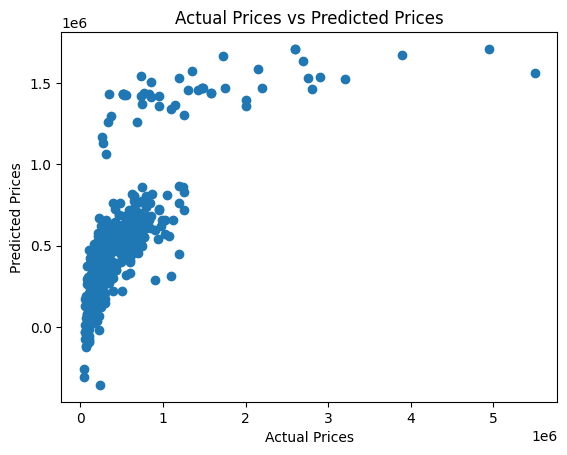

In [131]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

0.4387208731284218

2. Ridge Regression

In [168]:
#loading ridge regression model
ridge_reg_model=Ridge(alpha=1)

In [169]:
ridge_reg_model.fit(X_train, Y_train) #"fit()" function is used to train our model

Ridge(alpha=1)

Model Evaluation

In [170]:
#prediction on training data
training_data_prediction=ridge_reg_model.predict(X_train)
#It tells that predict on the basis of "X" training dataset (obviously), it will predict on the basis of other data sets, i.e., "X"

In [171]:
#R squared Error
error_score=metrics.r2_score(Y_train, training_data_prediction)
print("R squared error score: ",  error_score) #it is giving around 0.43 error

#"r2_score()" is the function of "metrics" module of "sklearn" library, which -
#-gives us R squared error. In this function, we compare our actual targeted -
#-value and the predicted value (by model)

# we can use various other metrics also for regression to get this error score -
#- like mean squared error, root mean square error, etc.

#we use accuracy score of the classification problem, while we use error score -
#-for the regression problem, are here since it is the regression problem, we -
#-are using error score

#also for the model evaluation, we can plot the targetted values and the -
#-values predicted by our model.

R squared error score:  0.4387208731284218


Visualize the Actual Prices and the Predicted Prices

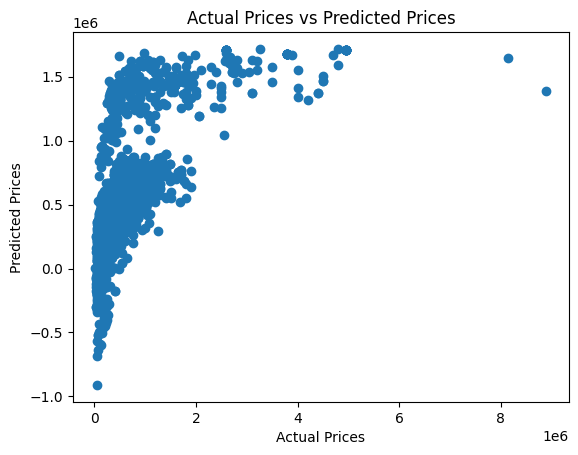

In [144]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

#here "plt" is "matplotlib"(we imported at begining). "scatter()" is the -
#function for scatter plot, since here we are plotting scattered plot.
#"show()" function of matplotlib library shows the formed graph

Now, Model Evaluation for Test Data

In [145]:
#prediction on testing data
testing_data_prediction=ridge_reg_model.predict(X_test)
#It tells that predict on the basis of "X" testing dataset (obviously), it will predict on the basis of other data sets, i.e., "X"

In [146]:
#R squared Error
error_score=metrics.r2_score(Y_test, testing_data_prediction)
print("R squared error score: ",  error_score) #it is giving around 0.43 error

R squared error score:  0.5172116968444009


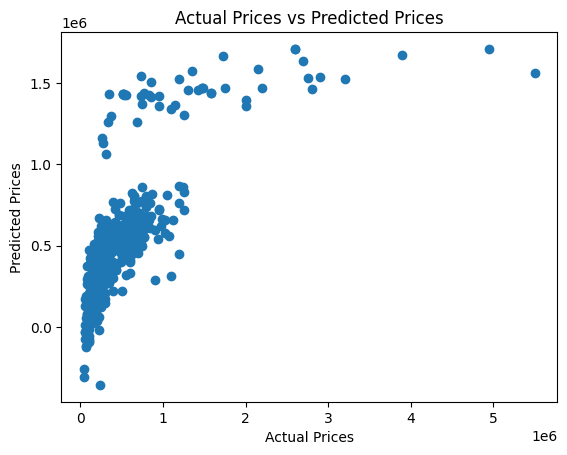

In [147]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Using Random Forest Regressor instead of Linear regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [178]:
training_data_prediction = rf.predict(X_train)

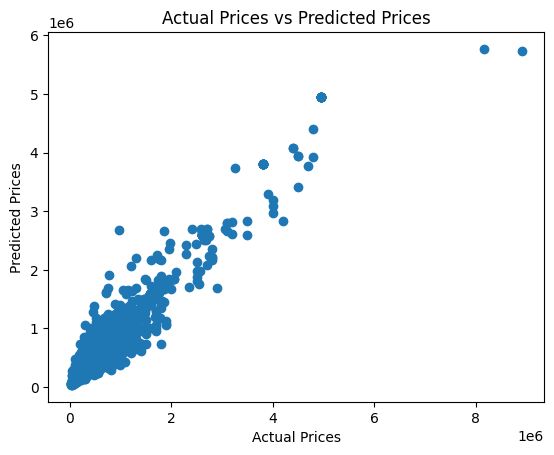

In [183]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [179]:
train_r2 = metrics.r2_score(Y_train, training_data_prediction)
print("Training R² score:", train_r2)

Training R² score: 0.9165568221811584


In [181]:
testing_data_prediction = rf.predict(X_test)

test_r2 = metrics.r2_score(Y_test, testing_data_prediction)
print("Testing R² score:", test_r2)

Testing R² score: 0.7051409083365


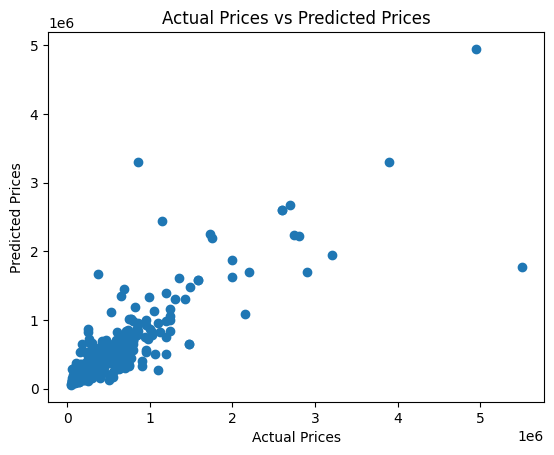

In [184]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()